#  Importing Modules

In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
stop_words = set(stopwords.words('english')) #Setting the language for nltk framework


# Importing Dataset

In [3]:
df = pd.read_csv(r"C:\Users\yoges\Downloads\sexharassment_train.csv\train.csv")
test_df =pd.read_csv(r"C:\Users\yoges\Downloads\sexharassment_train.csv\test.csv")


## Checking Redundancy 

In [4]:
def dup(dataframe):    
    """
        This function checks for redundancy in the dataset

        Parameters:
        dataframe : The dataset.

        Returns:
        tuple:  the row and the no.of data has been repeated.

    """
    df = dataframe[dataframe.duplicated()]
    return df,len(df)

# Checking in training set
train_duplicate,count = dup(df)
print('Number of duplicate rows',count)
print(train_duplicate)



Number of duplicate rows 428
                                            Description  Commenting  \
388   This survey is carried out by safecity (Red do...           1   
447                                  it was really bad.           1   
452                                  it was really bad.           1   
460                                          misbehaved           0   
537                                  it was really bad.           1   
...                                                 ...         ...   
7109                            Harassed in the evening           0   
7114                                         misbehaved           1   
7119                                         misbehaved           1   
7150                                happened in morning           1   
7175                                         misbehaved           1   

      Ogling/Facial Expressions/Staring  Touching /Groping  
388                                   1                  

In [5]:
#Checking in test set
test_duplicate,count = dup(test_df)
print('Number of duplicate rows',count)
print(test_duplicate)

Number of duplicate rows 61
                                            Description  Commenting  \
99          I was standing when a neighbour spanked me.           0   
150                                          harassment           1   
165                                   Touching, groping           0   
286                                  it was really bad.           1   
295                                          harassment           1   
...                                                 ...         ...   
1597                                         misbehaved           1   
1630                                         harassment           1   
1636  This survey is carried out by safecity (Red Do...           1   
1637                                 it was really bad.           1   
1663                                    chain snatching           0   

      Ogling/Facial Expressions/Staring  Touching /Groping  
99                                    0                  1

## Removing the redundant data

In [6]:
df.drop_duplicates(subset="Description",keep= False, inplace = True)
test_df.drop_duplicates(subset="Description",keep= False, inplace = True)

# Data Preprocessing

In [7]:
def preprocess_text(text):
    """
    Preprocesses the input text by performing the following steps:
    1. Removes special characters from the content.
    2. Converts the text to lowercase.
    3. Tokenizes the content.
    4. Removes stopwords.
    5. Joins the tokens back into a string.

    Parameters:
    text (str): The input text to be preprocessed.

    Returns:
    str: The preprocessed text after applying the specified transformations.
    """
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text


In [8]:
# Preprocess the 'Description' column in the training DataFrame (df)
df['Description'] = df['Description'].apply(lambda x: preprocess_text(x))

# Preprocess the 'Description' column in the testing DataFrame (test_df)
test_df['Description'] = test_df['Description'].apply(lambda x: preprocess_text(x))


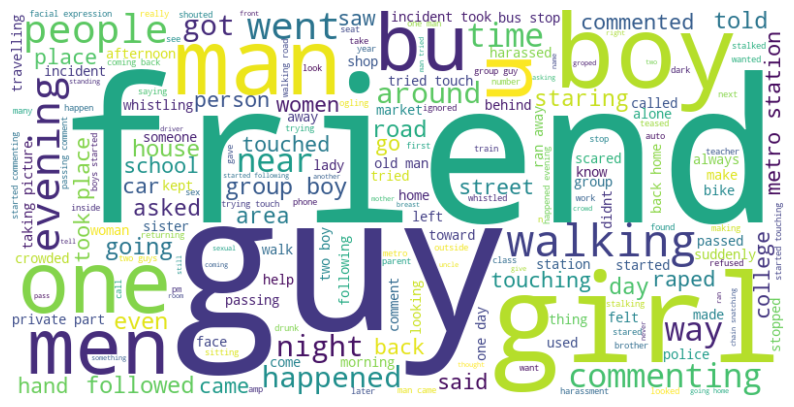

In [35]:
text_data = ' '.join(df['Description'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:

# creating a instance of TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=15,max_features=3000)


# seperating feature and labels from the dataset
x = df['Description']
y = df.drop("Description", axis='columns')
x_test = test_df['Description']
y_test = test_df.drop("Description", axis='columns')

# Vectorize the preprocessed text data
X = vectorizer.fit_transform(x)
X_test = vectorizer.transform(x_test)



# Training the models (finding the correct model)

# K-NN

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=501)

# Fit the classifier to the training data
knn_classifier.fit(X,y)

ypred_knn = knn_classifier.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(ypred_knn, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, ypred_knn)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_value_xg = hamming_loss(y_test, ypred_knn)
print("Hamming Loss:", hamming_loss_value_xg)


ROC AUC Score: 0.8475048840513756
Accuracy Score: 0.4933417882054534
Hamming Loss: 0.22426548298456986


# XGBoost

In [11]:
# Initialize the XGBoost classifier with a random state and enable categorical features
model = XGBClassifier(random_state=84, enable_categorical=True)

# Train the model on the training data
model.fit(X, y)

# Predict labels for the test data
ypred_xg = model.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(ypred_xg, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, ypred_xg)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_value_xg = hamming_loss(y_test, ypred_xg)
print("Hamming Loss:", hamming_loss_value_xg)


ROC AUC Score: 0.8237842258868727
Accuracy Score: 0.6087507926442612
Hamming Loss: 0.16973155781018812


# Random Forest

In [12]:

# Initialize ensemble classifiers
random_forest = RandomForestClassifier(n_estimators=100)

# Train ensemble classifiers
random_forest.fit(X, y)
y_pred_rf = random_forest.predict(X_test)

# Calculate the ROC AUC score
score = roc_auc_score(y_pred_rf, y_test)
print("ROC AUC Score:", score)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy Score:", accuracy)

# Calculate the Hamming loss
hamming_loss_rf = hamming_loss(y_test, y_pred_rf)
print("Hamming Loss:", hamming_loss_rf)


ROC AUC Score: 0.8090948305334266
Accuracy Score: 0.5941661382371591
Hamming Loss: 0.17776368632424436


### making a pipeline to combine the vectorizer and the model

In [13]:

pipe_rf = make_pipeline(
    vectorizer,  # You can adjust the parameters as needed
    random_forest  # You can adjust the parameters as needed
)

print(pipe_rf.predict_proba([test_df['Description'][40]]))

[array([[0.35, 0.65]]), array([[0.38, 0.62]]), array([[0.96, 0.04]])]


# Ensemble (OneVsRest & SVC)

In [14]:

model = OneVsRestClassifier(SVC())
model.fit(X, y)
y_pred = model.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred)
hamming_loss_ab = hamming_loss(y_test, y_pred)

print("SVC- Accuracy:", accuracy_ab, "Hamming Loss:", hamming_loss_ab)

SVC- Accuracy: 0.6207989854153456 Hamming Loss: 0.16719509617417036


In [15]:
pipe_En = make_pipeline(
    vectorizer,  
    model  
)


# XAI

In [16]:
# Define class names based on your model's output
class_names = ['Commenting', 'Staring', 'Touching']

instanceNum = 570

In [17]:
i = 0
explainer = LimeTextExplainer(class_names=["not"+class_names[0],class_names[0]])

def predict_proba(text_instances):
    return (pipe_rf.predict_proba(text_instances)[i])

explanation = explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)
i+=1

In [18]:
test_df['Description'][instanceNum]

'incident happened one friends near railway line chanakyapuri one man came continuously commenting stalking'

In [19]:
explanation.as_list()

[('commenting', 0.6286271741425585),
 ('man', -0.05487403934495095),
 ('one', -0.028731727931087393),
 ('stalking', -0.01612530261614038),
 ('continuously', -0.014839212370939752),
 ('happened', 0.01467762034150819),
 ('friends', -0.011571976669181897),
 ('railway', 0.008572839392371847),
 ('came', -0.005342601845018608),
 ('near', 0.0013200136555230628),
 ('incident', -0.0009760266539889893),
 ('line', 0.0007237135776789486),
 ('chanakyapuri', -0.00046442453673579194)]

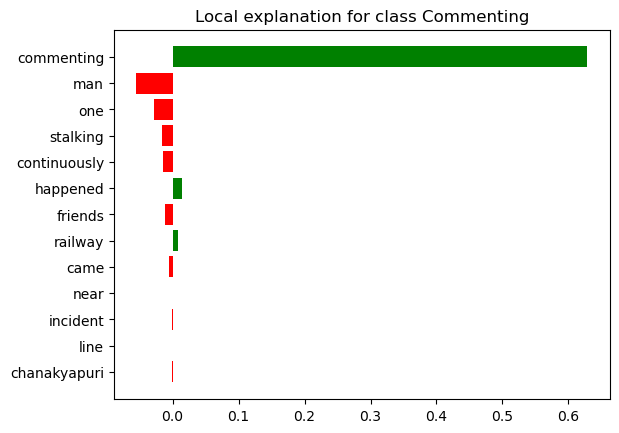

In [20]:
f =explanation.as_pyplot_figure()

In [21]:
explanation.show_in_notebook(text=True)

In [22]:
# Initialize the LimeTextExplainer with the class names
explainer = LimeTextExplainer(class_names=["not"+class_names[i],class_names[i]])


In [23]:
explanation= explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)
i+=1

In [24]:
explanation.as_list()

[('commenting', -0.047643725141434425),
 ('continuously', 0.039453519116225966),
 ('incident', 0.030291111085789003),
 ('man', -0.030140750692960853),
 ('near', 0.023637115844168582),
 ('railway', -0.0160564703793693),
 ('came', -0.01589624264543585),
 ('stalking', -0.013074383001063433),
 ('friends', -0.012422921877873694),
 ('line', -0.00881615109442502),
 ('one', 0.005482197820807792),
 ('happened', -0.005003687073899582),
 ('chanakyapuri', -0.0006486081399002014)]

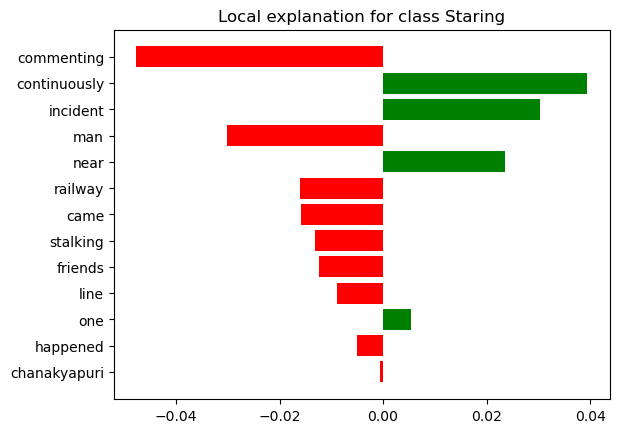

In [25]:
f =explanation.as_pyplot_figure()

In [26]:
explanation.show_in_notebook(text=True)

In [27]:
explainer = LimeTextExplainer(class_names=["not"+class_names[i],class_names[i]])


In [28]:
explanation = explainer.explain_instance(test_df['Description'][instanceNum], predict_proba,num_features=520)


In [32]:
explanation.as_list()

[('commenting', -0.14243784221692066),
 ('man', 0.07610014995929996),
 ('one', 0.04804091783342828),
 ('came', 0.03085306944667739),
 ('happened', 0.02335694397296775),
 ('near', 0.009020824478535363),
 ('continuously', -0.008845872289582312),
 ('friends', -0.007742550282087795),
 ('railway', 0.005748558130498672),
 ('line', -0.003503687663073372),
 ('stalking', -0.0025274200067471548),
 ('incident', 0.00163536069608239),
 ('chanakyapuri', 0.0015832234100629599)]

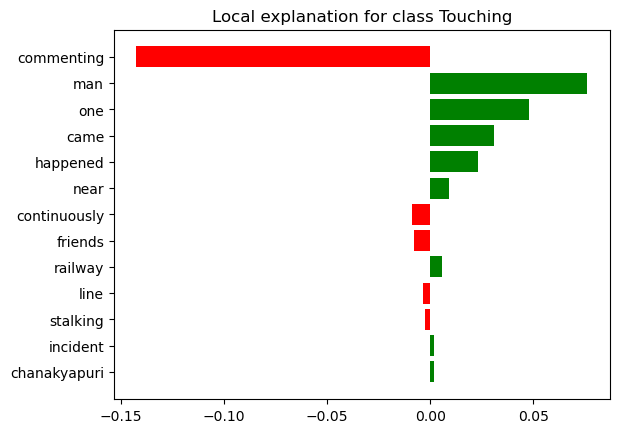

In [30]:
f =explanation.as_pyplot_figure()

In [31]:
explanation.show_in_notebook(text=True)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf', 'poly'],
    # Add other parameters you want to tune
}

# Initialize the One-vs-Rest SVC classifier
svm_classifier = OneVsRestClassifier(SVC())

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the data
grid_search.fit(X, y)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test)

Best Parameters: {'estimator__C': 1, 'estimator__kernel': 'linear'}


In [61]:
from sklearn.metrics import hamming_loss

# Train the best estimator with the optimal parameters
best_estimator.fit(X, y)

# Make predictions on the test data
y_pred = best_estimator.predict(X_test)

# Calculate the Hamming loss
hamming_loss_score = hamming_loss(y_test, y_pred)

print("Hamming Loss for the best estimator:", hamming_loss_score)

Hamming Loss for the best estimator: 0.15037208108801642


In [132]:
inp = input("type the story")

data = pipe.predict_proba(text_instances)
Harashments = ['Commenting','Staring','Touching']

def Harash(data):
    temp = []
    if data[0] == 1:
        temp.append(Harashments[0])
    if data[1] == 1:
        temp.append(Harashments[1])
    if data[2] == 1:
        temp.append(Harashments[2])
    return temp

for data in Data:
    h = Harash(data)
    if len(h) != 0:
        if len(h) == 1:
            print(f"Harashment Types {h[0]}.")
        elif len(h) == 2:
            print(f"Harashment Types {h[0]} and {h[1]}.")
        else:
            print(f"Harashment Types {h[0]}, {h[1]} and {h[2]}.")
        
    else:
        print("No Sexual Harashment.")

NameError: name 'Data' is not defined

## Checking the maximum no.of words in a row

In [28]:
# Tokenize the 'description' column
df['tokenized_description'] = df['Description'].apply(lambda x: x.split())

# Count the number of tokens in each row
df['num_words'] = df['tokenized_description'].apply(len)

# Find the maximum number of words
max_words = df['num_words'].max()

print("Maximum number of words in a row:", max_words)

Maximum number of words in a row: 1042
